In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Hotel Reservations.csv")

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df=df.drop("Booking_ID",axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df["type_of_meal_plan"]=encode.fit_transform(df["type_of_meal_plan"])

In [7]:
df["room_type_reserved"]=encode.fit_transform(df["room_type_reserved"])

In [8]:
df["market_segment_type"]=encode.fit_transform(df["market_segment_type"])

In [9]:
x=df.drop("booking_status",axis=1)

In [10]:
y=df["booking_status"]

<AxesSubplot:xlabel='booking_status', ylabel='count'>

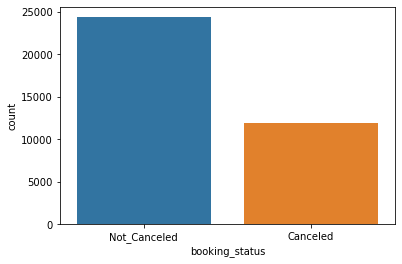

In [11]:
sns.countplot(df["booking_status"])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [14]:
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")

In [16]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [17]:
prediction=knn.predict(x_test)

In [18]:
accuracy_score(y_test,prediction)

0.8030873839933842

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm=confusion_matrix(y_test,prediction)

In [27]:
pd.DataFrame(cm,columns=["no","yes"],index=["no","yes"])

,no,yes
no,2203,1371
yes,772,6537


In [29]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,prediction)

In [31]:
print(cr)

              precision    recall  f1-score   support

    Canceled       0.74      0.62      0.67      3574
Not_Canceled       0.83      0.89      0.86      7309

    accuracy                           0.80     10883
   macro avg       0.78      0.76      0.77     10883
weighted avg       0.80      0.80      0.80     10883



In [32]:
#under sampling

In [33]:
from imblearn.under_sampling import RandomUnderSampler

In [35]:
print("before undersampling\n",y_train.value_counts())

before undersampling
 Not_Canceled    17081
Canceled         8311
Name: booking_status, dtype: int64


In [37]:
under_sampl=RandomUnderSampler(random_state=0,replacement=True)
x_train_under,y_train_under=under_sampl.fit_resample(x_train,y_train)

In [41]:
print(y_train_under.value_counts())

Canceled        8311
Not_Canceled    8311
Name: booking_status, dtype: int64


In [47]:
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
knn.fit(x_train_under,y_train_under)

KNeighborsClassifier(metric='euclidean')

In [48]:
prediction=knn.predict(x_test)

In [49]:
accuracy_score(y_test,prediction)

0.7405127262703298

In [42]:
#oversampling

In [44]:
from imblearn.over_sampling import RandomOverSampler
y_train.value_counts()

Not_Canceled    17081
Canceled         8311
Name: booking_status, dtype: int64

In [50]:
over_sampl=RandomOverSampler(random_state=0)

In [51]:
x_train_over,y_train_over=over_sampl.fit_resample(x_train,y_train)

In [52]:
print(y_train.value_counts())

Not_Canceled    17081
Canceled         8311
Name: booking_status, dtype: int64


In [53]:
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
knn.fit(x_train_over,y_train_over)
prediction=knn.predict(x_test)
accuracy_score(y_test,prediction)

0.7632086740788385

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
smote=SMOTE()

In [61]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [66]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(x_train_smote,y_train_smote)

KNeighborsClassifier(metric='euclidean')

In [67]:
prediction=knn.predict(x_test)

In [68]:
accuracy_score(y_test,prediction)

0.7725810897730405